<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Plotting the Walrus Data on a map

In [3]:
import os
import pandas as  pd
import numpy as np

In [4]:
filename = os.path.join('Walrus_Data','Walruses.csv')
df = pd.read_csv(filename, parse_dates=[1], 
                 thousands=',')
df.head(5)

,Walrus,DateTimeUTC,Xcoord,Ycoord,Behav,Longitude,Latitude
0,271,2008-05-31 19:25:00,95616.95,-528324.60,1.00900,-167.956095,65.248715
1,271,2008-06-01 03:24:00,84741.71,-511653.75,1.00050,-168.177987,65.401217
2,271,2008-06-01 11:24:00,71834.45,-491176.95,1.00625,-168.444360,65.587969
3,271,2008-06-01 19:24:00,65275.80,-478935.62,1.02025,-168.580284,65.699143
4,271,2008-06-02 03:24:00,69343.24,-473948.91,1.00775,-168.489215,65.742984


### Selecting each Walrus

In [5]:
wd = df.pivot(index='DateTimeUTC', columns='Walrus') #row, column, values (optional)
w271 = df.ix[df.Walrus == 271]
w281 = df.ix[df.Walrus == 281]
w322 = df.ix[df.Walrus == 322]

### Plotting the walrus behavior

Several steps:
1. Create a map centered around the region
2. Draw coastlines
3. Draw countries
4. Fill oceans and coastline
5. Draw the oberservations of the walrus on map

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


?Basemap.drawmeridians

### Drawing an empty map of the region

In [20]:
lons = w281.Longitude.values
lats = w281.Latitude.values
lons_c=np.average(lons)
lats_c=np.average(lats)
print (lons_c, lats_c)

(-169.59596290181815, 66.676100493272713)


{63: ([<matplotlib.lines.Line2D at 0x11905ef10>,
  []),
 64: ([<matplotlib.lines.Line2D at 0x118e0c2d0>], []),
 65: ([<matplotlib.lines.Line2D at 0x118e0c890>], []),
 66: ([<matplotlib.lines.Line2D at 0x118e0ce50>], []),
 67: ([<matplotlib.lines.Line2D at 0x118e24450>], []),
 68: ([<matplotlib.lines.Line2D at 0x118e24a10>], []),
 69: ([<matplotlib.lines.Line2D at 0x118e24fd0>], []),
 70: ([<matplotlib.lines.Line2D at 0x118e345d0>], []),
 71: ([<matplotlib.lines.Line2D at 0x118e34b90>], []),
 72: ([<matplotlib.lines.Line2D at 0x11a315190>], []),
 73: ([<matplotlib.lines.Line2D at 0x11a315750>], [])}

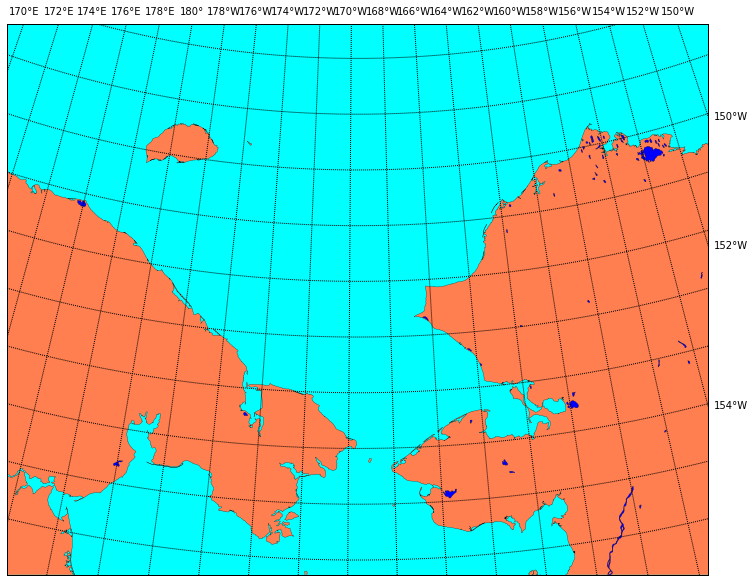

In [21]:
#
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='h',
              lat_0=lats_c+2,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# create a grid 
# draw lat/lon grid lines every 2 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])


### Plotting one observation

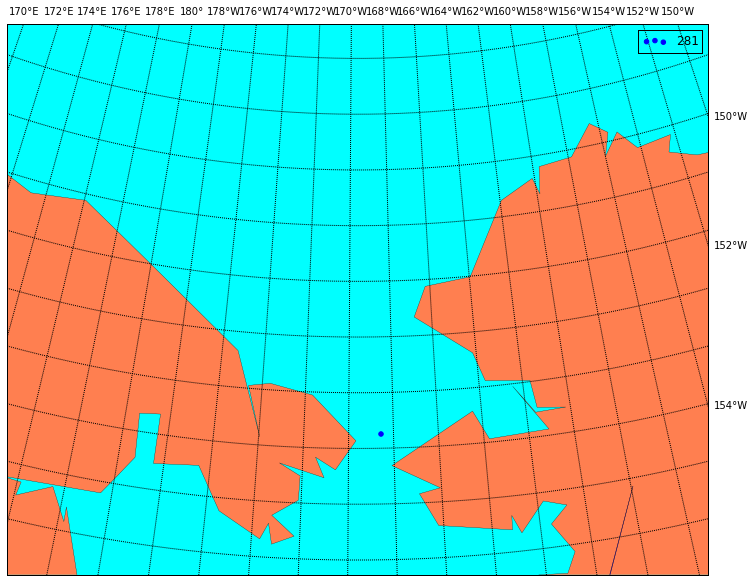

In [16]:
#
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='c',
              lat_0=lats_c+2,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# create a grid 
# draw lat/lon grid lines every 2 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])

# Walrus 281
x, y = map(lons[0],lats[0])
map.scatter(x,y,color='b',label='281')

plt.legend()

### Plot all walrus observations

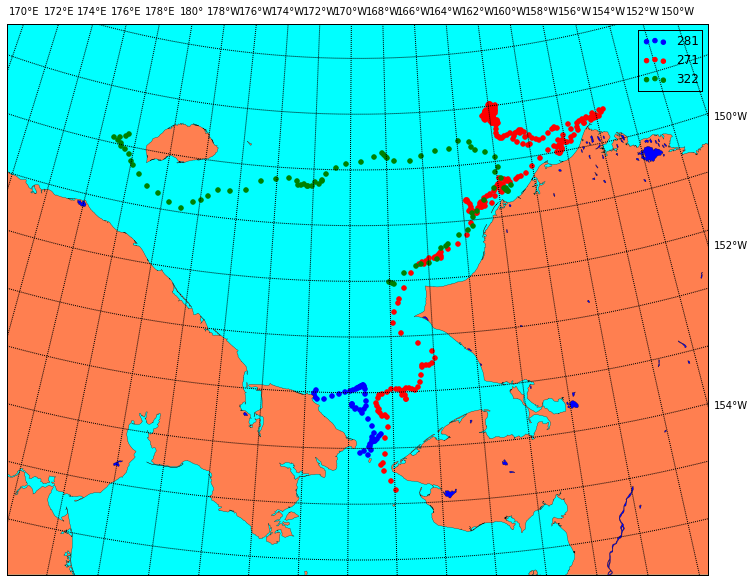

In [19]:
#
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='h',
              lat_0=lats_c+2,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# create a grid 
# draw lat/lon grid lines every 2 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])

# Walrus 281
lons = w281.Longitude.values
lats = w281.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='b',label='281')

# now for walrus 271
lons = w271.Longitude.values
lats = w271.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='r',label='271')

# now for walrus 322
lons = w322.Longitude.values
lats = w322.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='g',label='322')
plt.legend()